In [39]:
import numpy as np 
import pandas as pd
import torch
from tqdm import tqdm
from matplotlib import pyplot as plt

In [40]:
data = pd.read_csv("alldata.csv", index_col = 0)

In [41]:
data.index = np.arange(len(data))

In [42]:
data = data.drop("Unnamed: 0.1", 1)

In [43]:
hier = np.vectorize(lambda x : 1 if "-" in x else len(x) - 1)
data["level"] = hier(data["NAICS.id"])

In [44]:
len(data["NAICS.display-label"].unique())

105

In [45]:
level1_name = set(data["NAICS.display-label"][data["level"] == 1])
level2_name = set(data["NAICS.display-label"][data["level"] == 2])
level3_name = set(data["NAICS.display-label"][data["level"] == 3])
level4_name = set(data["NAICS.display-label"][data["level"] == 4])
level5_name = set(data["NAICS.display-label"][data["level"] == 5])
level1_id = set(data["NAICS.id"][data["level"] == 1])
level2_id = set(data["NAICS.id"][data["level"] == 2])
level3_id = set(data["NAICS.id"][data["level"] == 3])
level4_id = set(data["NAICS.id"][data["level"] == 4])
level5_id = set(data["NAICS.id"][data["level"] == 5])

In [46]:
append0 = np.vectorize(lambda x : str(x) if len(str(x)) == 5 else "0" + str(x))
data["zip"] = append0(data["zip"])

<BarContainer object of 5 artists>

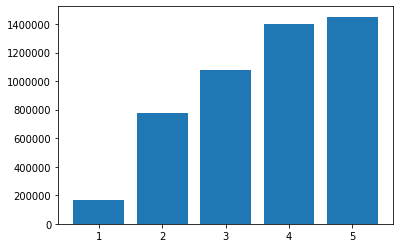

In [47]:
plt.bar(5-np.arange(len(data["level"].value_counts())), data["level"].value_counts())

In [48]:
# data["level"].value_counts()
data.columns

Index(['zip', 'NAICS.id', 'NAICS.display-label', 'RCPSZFE.display-label',
       'ESTAB', 'City Name', 'State', 'level'],
      dtype='object')

In [49]:
inter_45 = level4_name.intersection(level5_name)
inter_34 = level3_name.intersection(level4_name)
inter_23 = level2_name.intersection(level3_name)
r = np.arange(len(data))
l5 = data[data["level"] == 5]

In [50]:
data.loc[16, "NAICS.display-label"]
get_labels = np.vectorize(lambda x : x in inter_45)
labels = get_labels(l5["NAICS.display-label"])
idx2drop = l5.index[labels]

In [51]:
data = data.drop(idx2drop,0) 
data.index = np.arange(len(data))

In [52]:
l4 = data[data["level"] == 4]
get_labels = np.vectorize(lambda x : x in inter_34)
labels = get_labels(l4["NAICS.display-label"])
idx2drop = l4.index[labels]
data = data.drop(idx2drop,0) 
data.index = np.arange(len(data))

In [53]:
l3 = data[data["level"] == 3]
get_labels = np.vectorize(lambda x : x in inter_23)
labels = get_labels(l3["NAICS.display-label"])
idx2drop = l3.index[labels]
data = data.drop(idx2drop,0) 
data.index = np.arange(len(data))

In [54]:
level1_name = set(data["NAICS.display-label"][data["level"] == 1])
level2_name = set(data["NAICS.display-label"][data["level"] == 2])
level3_name = set(data["NAICS.display-label"][data["level"] == 3])
level4_name = set(data["NAICS.display-label"][data["level"] == 4])
level5_name = set(data["NAICS.display-label"][data["level"] == 5])
level1_id = set(data["NAICS.id"][data["level"] == 1])
level2_id = set(data["NAICS.id"][data["level"] == 2])
level3_id = set(data["NAICS.id"][data["level"] == 3])
level4_id = set(data["NAICS.id"][data["level"] == 4])
level5_id = set(data["NAICS.id"][data["level"] == 5])

In [55]:
labels = list(data["RCPSZFE.display-label"] == 'Establishments not operated for the entire year')
idx2drop = data.index[labels]
data = data.drop(idx2drop,0) 
data.index = np.arange(len(data))

In [56]:
labels = list(data["RCPSZFE.display-label"] ==  'Establishments operated for the entire year')
idx2drop = data.index[labels]
data = data.drop(idx2drop,0) 
data.index = np.arange(len(data))

In [57]:
values = data["RCPSZFE.display-label"].unique()
values

array(['All establishments',
       'Establishments operated entire year with sales/receipts/revenue of $100,000 to $249,999',
       'Establishments operated entire year with sales/receipts/revenue of $250,000 to $499,999',
       'Establishments operated entire year with sales/receipts/revenue of $500,000 to $999,999',
       'Establishments operated entire year with sales/receipts/revenue of $1,000,000 or more',
       'Establishments operated entire year with sales/receipts/revenue less than $100,000'],
      dtype=object)

In [58]:
weight_dict = {'All establishments' : 0,
          'Establishments operated entire year with sales/receipts/revenue less than $100,000' : 0.5,
          'Establishments operated entire year with sales/receipts/revenue of $100,000 to $249,999': 1,
          'Establishments operated entire year with sales/receipts/revenue of $250,000 to $499,999' : 2,
          'Establishments operated entire year with sales/receipts/revenue of $500,000 to $999,999' : 4,
          'Establishments operated entire year with sales/receipts/revenue of $1,000,000 or more' : 8
         }

In [59]:
scale_dict = {'All establishments' : "Total",
          'Establishments operated entire year with sales/receipts/revenue less than $100,000' : "E",
          'Establishments operated entire year with sales/receipts/revenue of $100,000 to $249,999': "D",
          'Establishments operated entire year with sales/receipts/revenue of $250,000 to $499,999' : "C",
          'Establishments operated entire year with sales/receipts/revenue of $500,000 to $999,999' : "B",
          'Establishments operated entire year with sales/receipts/revenue of $1,000,000 or more' : "A"
         }

In [60]:
give_weight = np.vectorize(lambda x : weight_dict[x])
data['weight'] = give_weight(data["RCPSZFE.display-label"])

In [61]:
give_cat = np.vectorize(lambda x : scale_dict[x])
data['scale'] = give_cat(data["RCPSZFE.display-label"])

<BarContainer object of 405 artists>

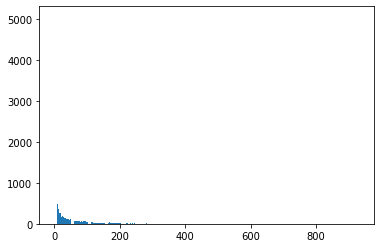

In [62]:
temp = data[data["scale"] == "Total"]
temp = temp[temp["level"] == 1]["ESTAB"]
# # plt.hist(temp)
dist = dict(temp.value_counts())
l = sorted(dist.items(), key = lambda x : x[0])
num = [pair[0] for pair in l]
count = [pair[1] for pair in l]
plt.bar(x=num, height=count)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

array([0.17357104, 0.27311761, 0.33738664, 0.38736603, 0.42271228,
       0.45201292, 0.47619538, 0.49742374, 0.51490794, 0.53115554,
       0.54633828, 0.55987222, 0.57189475, 0.58223413, 0.59271091,
       0.60167628, 0.61064166, 0.61946963, 0.62816021, 0.63557983,
       0.64293075, 0.64880462, 0.65546854, 0.6623042 , 0.66876202,
       0.67539159, 0.68150591, 0.68686452, 0.69212009, 0.6968604 ,
       0.70184117, 0.70719978, 0.71204314, 0.71657736, 0.72090547,
       0.72526793, 0.72952734, 0.73471421, 0.73797747, 0.74192773,
       0.74560319, 0.7491756 , 0.75278236, 0.75645782, 0.75982413,
       0.76322479, 0.76635065, 0.76982001, 0.77356417, 0.77669002,
       0.77967848, 0.78235779, 0.78589585, 0.78905606, 0.79249107,
       0.79513603, 0.79802143, 0.80107859, 0.80358615, 0.80674636,
       0.80935697, 0.81196757, 0.81492168, 0.81784144, 0.8202116 ,
       0.8230283 , 0.82467711, 0.82684117, 0.82903957, 0.83116928,
       0.83340203, 0.83570349, 0.8383828 , 0.84034075, 0.84250

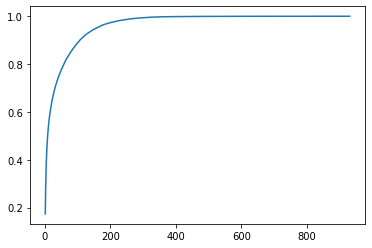

In [63]:
# print(np.array(dist.values))
# count
print(num)
y = np.cumsum(count)
cdf = y / y[-1]
plt.plot(num, cdf)
cdf

In [64]:
#### Equal Breath Binning
## 25 th percentile 
num=np.array(num)
per_25 = 3
## 50 th percentile
per_50 = num[abs(cdf - 0.50) < 0.003][0]

## 75 th percentile
per_75 = num[abs(cdf - 0.75) < 0.001][0]


In [65]:
temp = data[data["scale"] == "Total"]
temp = temp[temp["level"] == 1]
temp

,zip,NAICS.id,NAICS.display-label,RCPSZFE.display-label,ESTAB,City Name,State,level,weight,scale
0,06001,44-45,Retail trade,All establishments,81,Avon,CT,1,0,Total
185,06002,44-45,Retail trade,All establishments,63,Bloomfield,CT,1,0,Total
342,06006,44-45,Retail trade,All establishments,1,Windsor,CT,1,0,Total
350,06010,44-45,Retail trade,All establishments,168,Bristol,CT,1,0,Total
616,06011,44-45,Retail trade,All establishments,2,Bristol,CT,1,0,Total
...,...,...,...,...,...,...,...,...,...,...
2211481,99361,44-45,Retail trade,All establishments,4,Waitsburg,WA,1,0,Total
2211500,99362,44-45,Retail trade,All establishments,158,Walla Walla,WA,1,0,Total
2211778,99371,44-45,Retail trade,All establishments,1,Washtucna,WA,1,0,Total
2211784,99402,44-45,Retail trade,All establishments,2,Asotin,WA,1,0,Total


In [66]:
scale_labeling = np.vectorize(lambda x : "tiny" if x <= per_25 else ("small" if x <= per_50 else ("medium" if x < per_75 else "large")))
scale = scale_labeling(temp["ESTAB"])
zips = temp["zip"]
zip2scale = {z : s for z, s in zip(zips, scale)}

In [67]:
scale_labeling = np.vectorize(lambda x : zip2scale.get(x, "small"))
data["city scale"] = scale_labeling(data["zip"])

In [68]:
# data["city scale"].value_counts()
temp = data[data["scale"] == "Total"]
temp = temp[temp["level"] == 1]
temp["city scale"].value_counts()

tiny      9822
large     7406
medium    7225
small     4659
Name: city scale, dtype: int64

In [69]:
data["city scale"].value_counts()

large     1455869
medium     527258
small      128738
tiny       100089
Name: city scale, dtype: int64

In [70]:
### Takes long to run!!!!!
zips = data["zip"].unique()
zip2tw = {z : 0 for z in zips}
count = 0 
for z in zip2tw.keys():
    df = data[data["zip"] == z]
    df = df[df["level"] == 1]
    est = np.array(df["ESTAB"])
    weight = np.array(df["weight"])
    zip2tw[z] = est.dot(weight)
    count += 1
    if count % 100 == 0:
        print(count)
zip2tw


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900


KeyboardInterrupt: 

In [ ]:
# data[data["zip"] == "06010"]['RCPSZFE.display-label'][351]
a = data[data["zip"] == "06010"]
a = a[a['level'] == 1]

In [ ]:
cuda = torch.device('cuda')
idx2zip = {i : z  for i,z in enumerate(zips)}
zip2idx = {z : i  for i,z in enumerate(zips)}
total_weights = np.zeros([len(zips), 1])
for k in zip2tw.keys():
    total_weights[zip2idx[k]] = zip2tw[k]

In [ ]:
#np.save("zip2tw.npy", total_weights)
np.load("zip2tw.npy",total_weights)

In [ ]:
zip2vec = np.zeros([len(zips), 12])
count = 0
for z in zip2tw.keys():
    df = data[data["zip"] == z]
    df = df[df["level"] == 2]
    vec = []
    for name in level2_name:
        sub_df = df[df["NAICS.display-label"] == name]
        if len(sub_df) == 0:
            vec.append(0)
            continue
#         print(sub_df)
        est = torch.from_numpy(sub_df["ESTAB"].values).double().to(cuda)
        weight = torch.from_numpy(sub_df["weight"].values).double().to(cuda)
        val = est.dot(weight)
        vec.append(val)
    zip2vec[zip2idx[z]] = vec
    count += 1

    if count % 100 == 0:
        break
#     est = np.array(df["ESTAB"])
#     weight = np.array(df["weight"])
#     zip2tw[z] = est.dot(weight)
    

In [ ]:
zip2vec

In [ ]:
zip2vec[0]

In [ ]:
zip2vec[1]